In [1]:
import sys
import re
import os
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import gget
import mappy as mp
from Bio.Blast import NCBIWWW

In [2]:
n_sample = 10
n_rows = 3000
root_dir = "/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/"

res = []

def read_fastq(fpath, n_rows):
    """a function to parse a fastq file """
    count = -1
    res = []
    for read in pysam.FastxFile(fpath):
        count += 1
        if count == n_rows:
            break

        NlaIII = read.sequence.count('CATG')
        quals = read.get_quality_array()
        row = {
            'read_name' : read.name,
            'seq_length' : len(read.sequence),
            'n_NlaIII' : NlaIII,
            'mean_base_quality' : np.mean(quals),
            'median_base_quality' : np.median(quals),
            'min_base_quality' : np.min(quals),
            'max_base_quality' : np.max(quals),
            'sequence' : read.sequence,
        }

        res.append(row)
    return pd.DataFrame(res)
    
res = []
for run in os.listdir(root_dir):

    subdir_path = f"{root_dir}{run}/merged_fastq/"
    sample_files = np.random.choice(os.listdir(subdir_path), n_sample)

    for sample in sample_files:
        sample_path = f"{subdir_path}{sample}"

        df = read_fastq(sample_path, n_rows)
        df['run'] = run
        df['cell'] = sample
        res.append(df)

res = pd.concat(res)
res.head()

,read_name,seq_length,n_NlaIII,mean_base_quality,median_base_quality,min_base_quality,max_base_quality,sequence,run,cell
0,91849db0-386e-45c2-b9b0-1e7924674697,348,0,23.939655,23.0,2,50,TTTGCGTACTGGTTCAGTTACGTATTGCTGTGCTGGAGCCTGCTCG...,scPC96o_3,barcode21.fastq
1,39c95aec-d62b-4b9c-913e-fa7f1cbf1e55,281,0,32.085409,36.0,2,50,ATGTTGTGTAGCCTATTCGTTCCATTACGTATTGCTGGTGCTGGAG...,scPC96o_3,barcode21.fastq
2,0417e838-ab53-4a38-9687-9e15e9e83e1a,614,0,33.416938,37.0,2,50,TGTGTAGCTTGCTTCGACTCAGTCTCGTATTGCTGCTCTATCTTCC...,scPC96o_3,barcode21.fastq
3,466899b8-7c0d-4ea6-a317-e2fdfe4f185a,508,0,33.478346,38.0,3,50,GTTTTGCCTGTACTTCGTTCAGTTACGTATTGTTGATTAACCTTTC...,scPC96o_3,barcode21.fastq
4,9fd42aa1-0030-4274-a153-0f545a363fb2,282,0,28.382979,31.0,1,50,TATGGTTTTGTTTCCAGCTTACTCGTTCAGTTACGTATTGCTGGTG...,scPC96o_3,barcode21.fastq


/tmp/ipykernel_2159121/2786824704.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf,


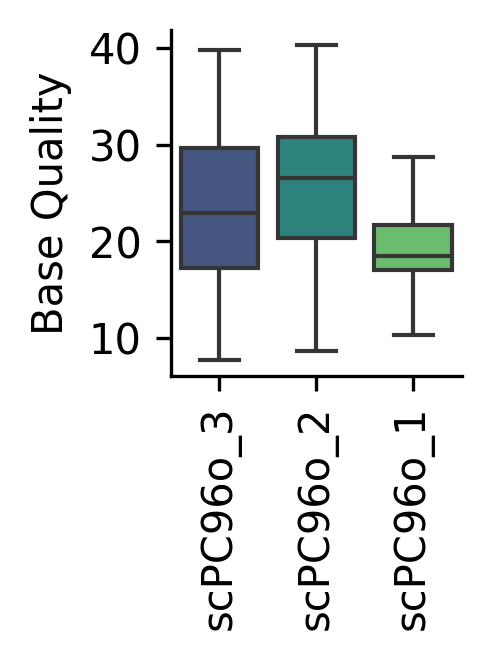

In [3]:
pdf = res.copy()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 1.5

sns.boxplot(data=pdf,
            x='run',
            y='mean_base_quality',
            showfliers=False,
            palette='viridis')

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('Base Quality')
plt.xlabel('')
sns.despine()

/tmp/ipykernel_2159121/1513078951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf,


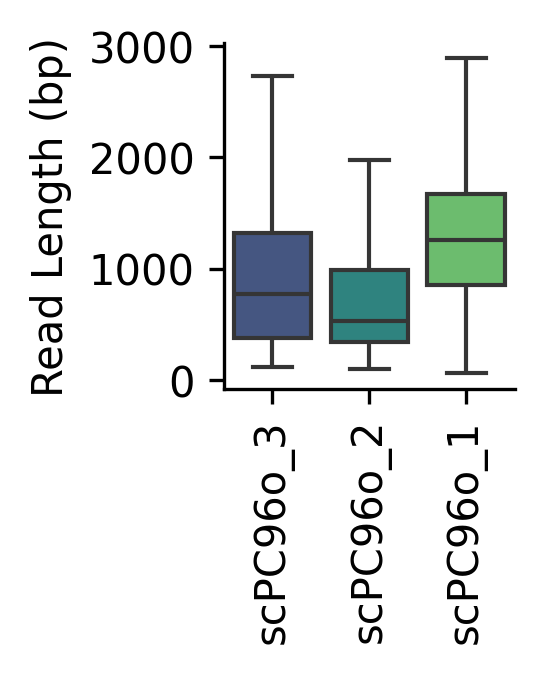

In [4]:
pdf = res.copy()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 1.5

sns.boxplot(data=pdf,
            x='run',
            y='seq_length',
            showfliers=False,
            palette='viridis')

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('Read Length (bp)')
plt.xlabel('')
sns.despine()

/tmp/ipykernel_2159121/3400285647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf,


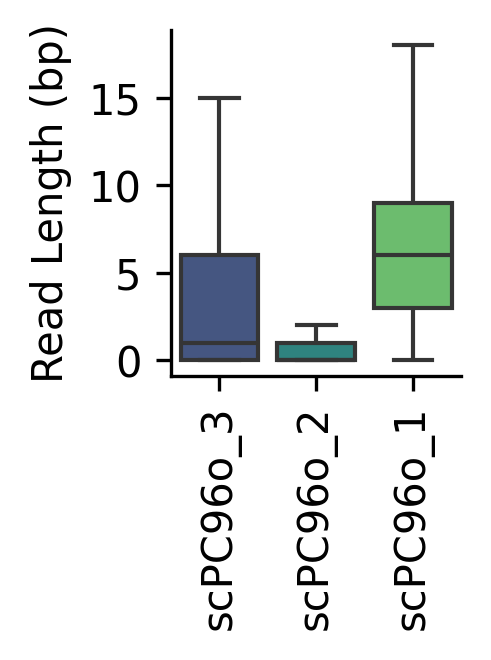

In [5]:
pdf = res.copy()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 1.5

sns.boxplot(data=pdf,
            x='run',
            y='n_NlaIII',
            showfliers=False,
            palette='viridis')

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('Read Length (bp)')
plt.xlabel('')
sns.despine()

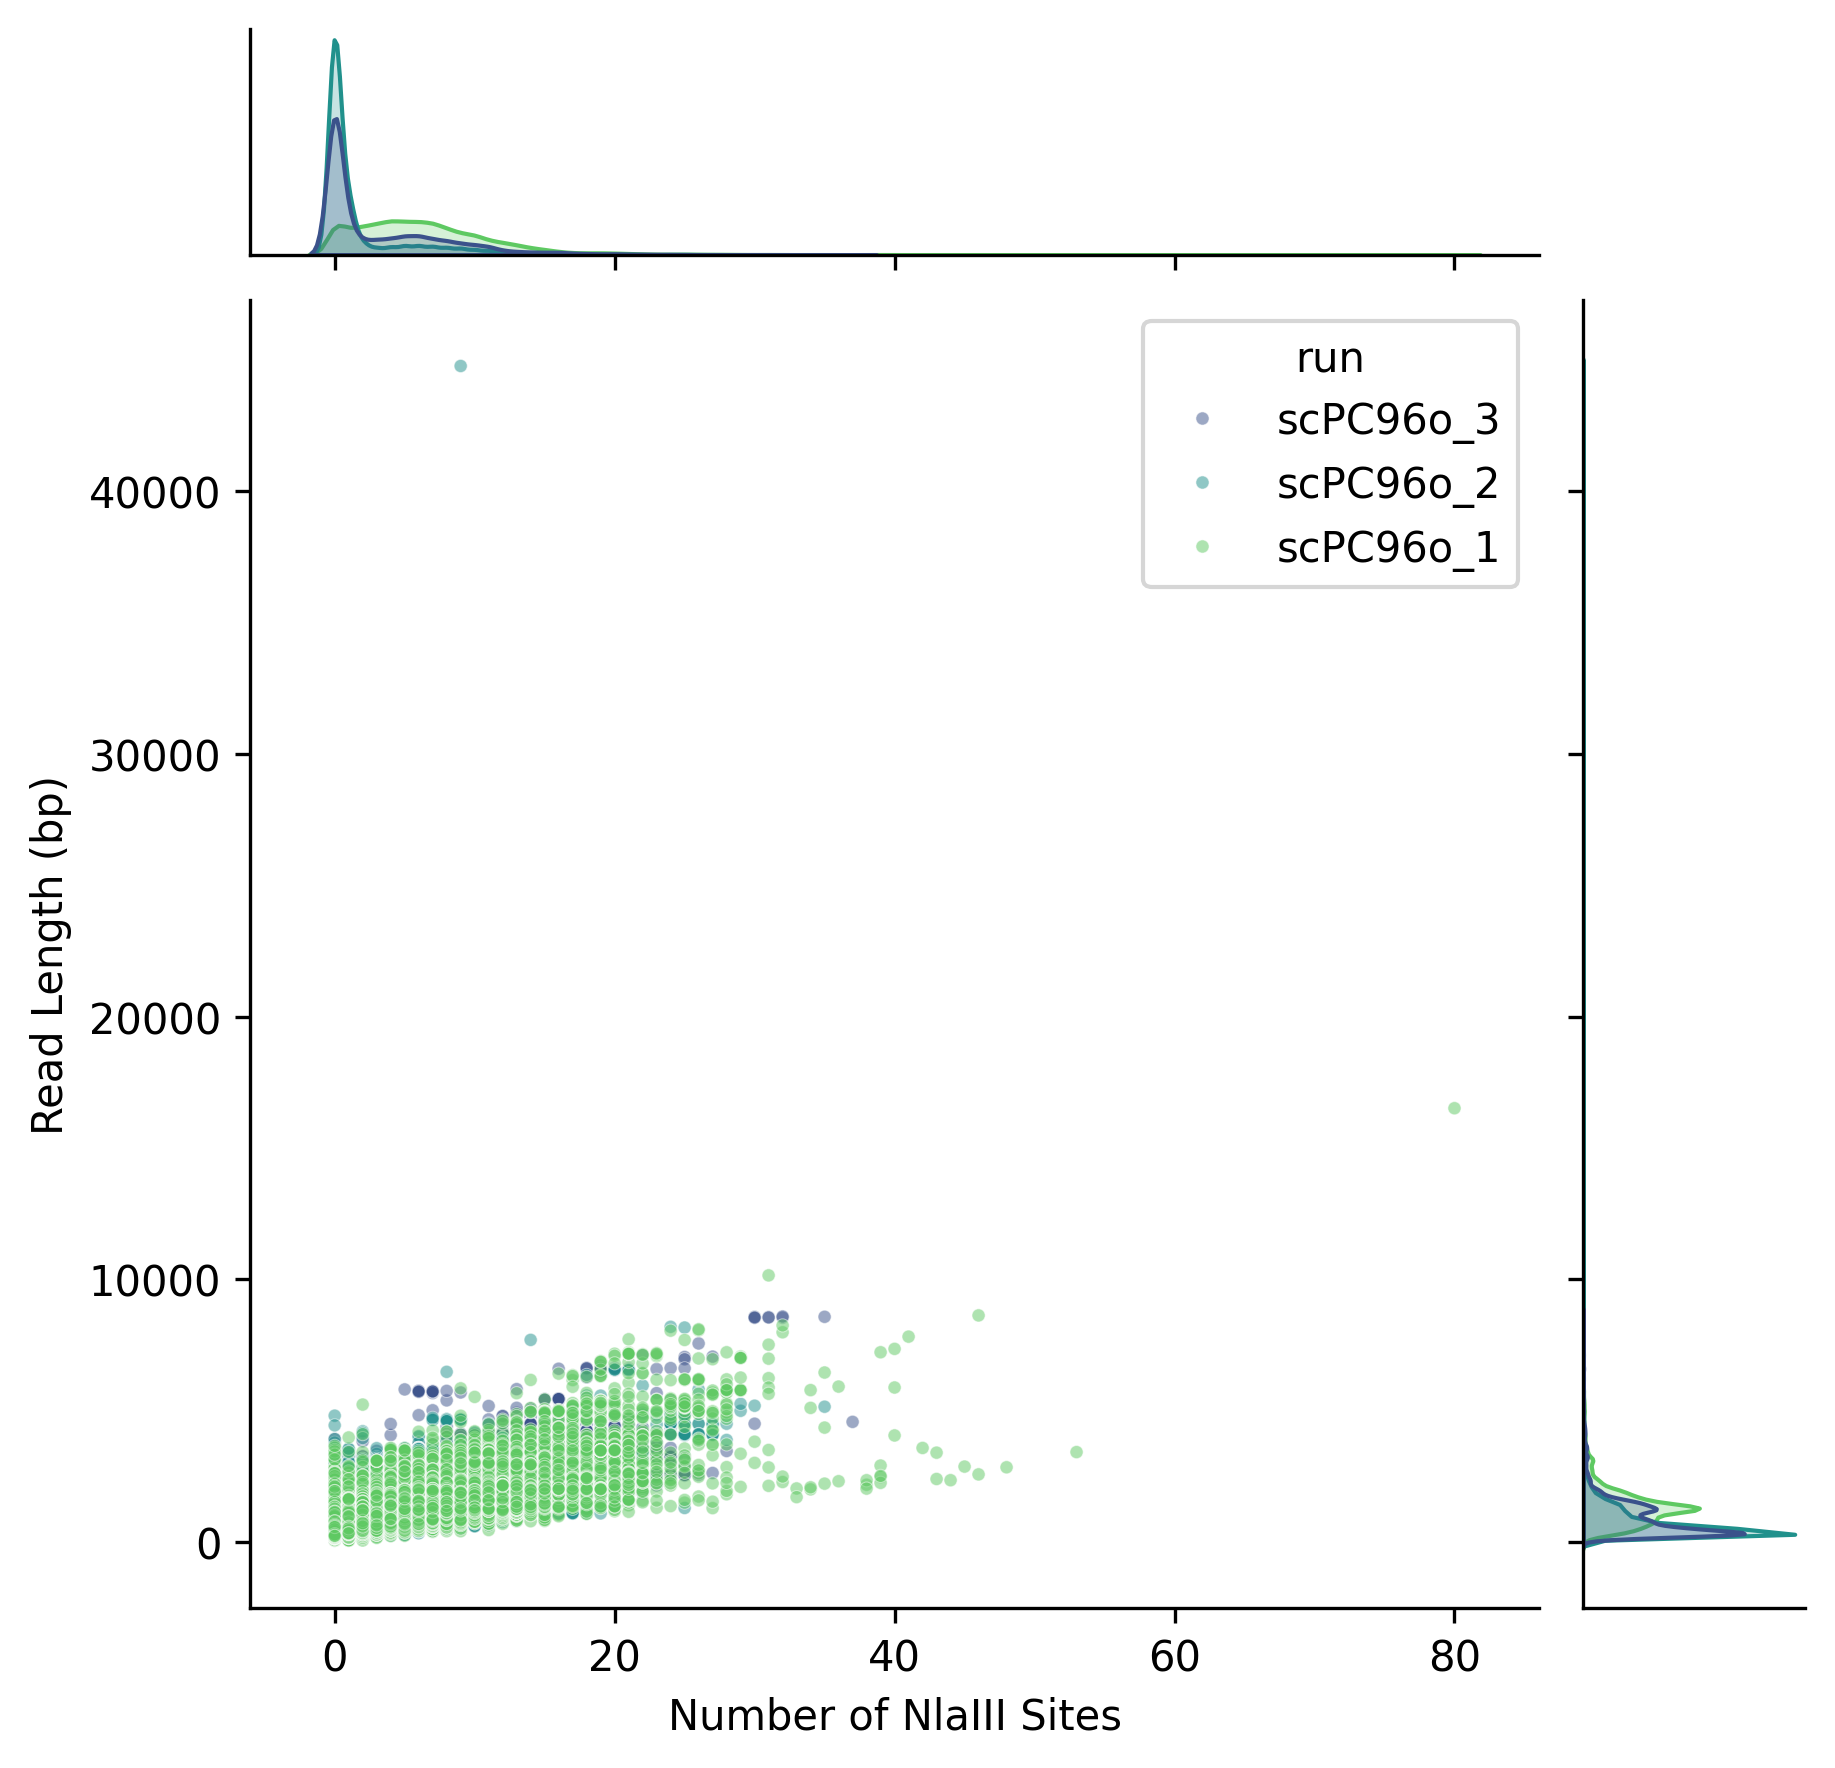

In [6]:
pdf = res.copy()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

g = sns.jointplot(
    data=pdf,
    x='n_NlaIII',
    y='seq_length',
    hue='run',
    s=10,
    alpha=0.5,
    palette='viridis',
)

plt.ylabel('Read Length (bp)')
plt.yscale('log')
plt.xlabel('Number of NlaIII Sites')
sns.despine()

# BLAST

In [7]:
res.head()

,read_name,seq_length,n_NlaIII,mean_base_quality,median_base_quality,min_base_quality,max_base_quality,sequence,run,cell
0,91849db0-386e-45c2-b9b0-1e7924674697,348,0,23.939655,23.0,2,50,TTTGCGTACTGGTTCAGTTACGTATTGCTGTGCTGGAGCCTGCTCG...,scPC96o_3,barcode21.fastq
1,39c95aec-d62b-4b9c-913e-fa7f1cbf1e55,281,0,32.085409,36.0,2,50,ATGTTGTGTAGCCTATTCGTTCCATTACGTATTGCTGGTGCTGGAG...,scPC96o_3,barcode21.fastq
2,0417e838-ab53-4a38-9687-9e15e9e83e1a,614,0,33.416938,37.0,2,50,TGTGTAGCTTGCTTCGACTCAGTCTCGTATTGCTGCTCTATCTTCC...,scPC96o_3,barcode21.fastq
3,466899b8-7c0d-4ea6-a317-e2fdfe4f185a,508,0,33.478346,38.0,3,50,GTTTTGCCTGTACTTCGTTCAGTTACGTATTGTTGATTAACCTTTC...,scPC96o_3,barcode21.fastq
4,9fd42aa1-0030-4274-a153-0f545a363fb2,282,0,28.382979,31.0,1,50,TATGGTTTTGTTTCCAGCTTACTCGTTCAGTTACGTATTGCTGGTG...,scPC96o_3,barcode21.fastq


In [8]:
# randomly BLAST a number of sequences
n_sample = 50

pdf = res.copy()
pdf = pdf.sample(n_sample)

bdf = []
for idx, rec in pdf.iterrows():
    seq = rec['sequence']

    edf = gget.blast(seq, limit=1, wrap_text=True)
    edf['run'] = rec['run']
    edf['cell'] = rec['cell']
    edf['seq_length'] = rec['seq_length']
    edf['n_NlaIII'] = rec['n_NlaIII']
    edf['mean_base_quality'] = rec['mean_base_quality']
    bdf.append(edf)

    
bdf = pd.concat(bdf)
bdf.head()

Tue Feb 27 14:26:26 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:26:26 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:26:26 2024 INFO BLAST initiated with search ID XWDV2MJV013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:26:57 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Hebeloma theobrominum isolateiso2 small subunit ribosomalRNA gene, partial sequence;internal transcribed spacer 1,complete sequence; and 5.8Sribosomal RNA gene, partialsequence",Hebeloma theobrominum,NaN,535364,78.7,78.7,30%,8.000000e-10,83.91%,442,OL693798.1


Tue Feb 27 14:26:57 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:26:57 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:26:58 2024 INFO BLAST initiated with search ID XWDW1MH3013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:27:29 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-185P20 on chromosome 2,complete sequence",Mus musculus,house mouse,10090,832,832,26%,0.0,92.01%,202001,AL772303.11


Tue Feb 27 14:27:29 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:27:29 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:27:29 2024 INFO BLAST initiated with search ID XWDX1VVK013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:28:00 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP23-179B10 from 3, completesequence",Mus musculus,house mouse,10090,387,387,16%,6.000000e-102,96.96%,204672,AC122831.2


Tue Feb 27 14:28:00 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:28:00 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:28:01 2024 INFO BLAST initiated with search ID XWDY03V4016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:28:31 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Nephridiophagidae sp. isolate34 small subunit ribosomal RNAgene, partial sequence;internal transcribed spacer 1,5.8S ribosomal RNA gene, andinternal transcribed spacer 2,complete sequence; and largesubunit ribosomal RNA gene,partial sequence",Nephridiophagidae sp.,NaN,2773928,56.5,56.5,6%,0.009,89.13%,4296,MW018149.1


Tue Feb 27 14:28:32 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:28:32 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:28:32 2024 INFO BLAST initiated with search ID XWDZ00BW016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:29:03 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus10 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,62.1,592,40%,0.0003,83.78%,4151,MN135764.1


Tue Feb 27 14:29:03 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:29:03 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:29:04 2024 INFO BLAST initiated with search ID XWDZZRBF013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:29:35 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus16 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,75.0,184,30%,2.000000e-08,83.33%,4325,MN135770.1


Tue Feb 27 14:29:35 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:29:35 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:29:35 2024 INFO BLAST initiated with search ID XWE0ZZV2016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:30:06 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus castaneus genomeassembly, chromosome: 16",Mus musculus castaneus,southeastern Asian house mouse,10091,2926,2926,71%,0.0,97.25%,94414171,OW971832.1


Tue Feb 27 14:30:06 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:30:06 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:30:07 2024 INFO BLAST initiated with search ID XWE1YFPJ016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:30:37 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus10 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,62.1,273,47%,0.0002,93.02%,4151,MN135764.1


Tue Feb 27 14:30:37 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:30:37 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:30:38 2024 INFO BLAST initiated with search ID XWE2YRVM016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:31:09 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP23-61B8 from chromosome 8,complete sequence",Mus musculus,house mouse,10090,176,253,17%,8.000000e-39,98.99%,218698,AC129330.4


Tue Feb 27 14:31:09 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:31:09 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:31:09 2024 INFO BLAST initiated with search ID XWE3XDFU013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:31:40 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus16 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,58.4,58.4,6%,0.002,100.00%,4325,MN135770.1


Tue Feb 27 14:31:40 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:31:40 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:31:41 2024 INFO BLAST initiated with search ID XWE4X2PS013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:32:12 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,Staphylococcuspseudintermedius strain 49_44chromosome,Staphylococcus pseudintermedius,NaN,283734,58.4,58.4,9%,0.001,100.00%,2584763,CP035743.1


Tue Feb 27 14:32:12 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:32:12 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:32:13 2024 INFO BLAST initiated with search ID XWE5WW3J013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:32:43 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP24-449M10 from 12, completesequence",Mus musculus,house mouse,10090,257,257,30%,2.000000e-63,96.77%,182060,AC142263.3


Tue Feb 27 14:32:43 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:32:43 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:32:44 2024 INFO BLAST initiated with search ID XWE6W0EP016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:33:15 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus11 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,73.1,127,65%,3.000000e-08,83.15%,4375,MN135765.1


Tue Feb 27 14:33:15 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:33:15 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:33:15 2024 INFO BLAST initiated with search ID XWE7VPGN013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:33:46 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneWI1-2791P21 on chromosome 4,complete sequence",Mus musculus,house mouse,10090,414,414,28%,2.000000e-110,96.46%,39608,CU104738.2


Tue Feb 27 14:33:47 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:33:47 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:33:47 2024 INFO BLAST initiated with search ID XWE8VP1C013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:34:18 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-256C17 on chromosome X,complete sequence",Mus musculus,house mouse,10090,1074,1074,44%,0.0,99.83%,179173,AL669973.10


Tue Feb 27 14:34:18 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:34:18 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:34:19 2024 INFO BLAST initiated with search ID XWE9UC9A013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:34:49 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus16 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,67.6,280,40%,0.000003,81.40%,4325,MN135770.1


Tue Feb 27 14:34:50 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:34:50 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:34:50 2024 INFO BLAST initiated with search ID XWEAU4K4016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:35:21 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,Mus musculus STARR-seq mESCenhancer starr_38830(LOC131387645) on chromosome15,Mus musculus,house mouse,10090,278,278,28%,2.000000e-69,98.12%,1631,NG_223535.1


Tue Feb 27 14:35:21 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:35:21 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:35:22 2024 INFO BLAST initiated with search ID XWEBTCU5013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:35:52 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Norovirus GII isolate 2048nonstructural polyprotein(ORF1) gene, partial cds; VP1(ORF2) gene, complete cds; andVP2 (ORF3) gene, partial cds",Norovirus GII,NaN,122929,62.1,118,15%,0.0001,97.22%,5643,MW045406.1


Tue Feb 27 14:35:52 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:35:52 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:35:53 2024 INFO BLAST initiated with search ID XWECTWJ7013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:36:24 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus11 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,56.5,113,17%,0.007,92.50%,4375,MN135765.1


Tue Feb 27 14:36:24 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:36:24 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:36:25 2024 INFO BLAST initiated with search ID XWEDSMJJ013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:36:56 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP23-411B19 from chromosome 1,complete sequence",Mus musculus,house mouse,10090,595,595,44%,7.000000e-165,91.94%,195050,AC124528.4


Tue Feb 27 14:36:56 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:36:56 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:36:56 2024 INFO BLAST initiated with search ID XWEEST9N013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:37:27 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-292J1 on chromosome 4,complete sequence",Mus musculus,house mouse,10090,1086,9128,84%,0.0,89.01%,244187,BX088570.6


Tue Feb 27 14:37:27 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:37:27 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:37:28 2024 INFO BLAST initiated with search ID XWEFRW7M013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:37:59 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-323E6 on chromosome 4,complete sequence",Mus musculus,house mouse,10090,734,734,40%,0.0,99.50%,145881,AL732498.15


Tue Feb 27 14:37:59 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:37:59 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:38:00 2024 INFO BLAST initiated with search ID XWEGRX47013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:38:31 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-377F5 on chromosome 4,complete sequence",Mus musculus,house mouse,10090,1057,1057,38%,0.0,97.58%,21444,BX640475.3


Tue Feb 27 14:38:31 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:38:31 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:38:31 2024 INFO BLAST initiated with search ID XWEHRK9F016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:39:02 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus15 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,54.7,164,17%,0.025,100.00%,4168,MN135769.1


Tue Feb 27 14:39:02 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:39:02 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:39:03 2024 INFO BLAST initiated with search ID XWEJP3JG016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:39:34 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus chromosome 8,clone RP24-96N12, completesequence",Mus musculus,house mouse,10090,525,807,28%,1.000000e-143,98.98%,143798,AC105948.9


Tue Feb 27 14:39:34 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:39:34 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:39:34 2024 INFO BLAST initiated with search ID XWEKP14R016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:40:05 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus10 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,60.2,543,43%,0.001,82.86%,4151,MN135764.1


Tue Feb 27 14:40:05 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:40:05 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:40:06 2024 INFO BLAST initiated with search ID XWEMNJST016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:40:36 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Norovirus GII isolate 2048nonstructural polyprotein(ORF1) gene, partial cds; VP1(ORF2) gene, complete cds; andVP2 (ORF3) gene, partial cds",Norovirus GII,NaN,122929,58.4,171,35%,0.001,97.06%,5643,MW045406.1


Tue Feb 27 14:40:37 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:40:37 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:40:37 2024 INFO BLAST initiated with search ID XWENNX43013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:41:08 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mouse DNA sequence from cloneRP23-416K12 on chromosome 11,complete sequence",Mus musculus,house mouse,10090,904,1835,34%,0.0,94.90%,160589,AL663066.12


Tue Feb 27 14:41:09 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:41:09 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:41:09 2024 INFO BLAST initiated with search ID XWEPNGUT016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:41:40 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus10 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,60.2,441,26%,0.001,85.25%,4151,MN135764.1


Tue Feb 27 14:41:40 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:41:40 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:41:41 2024 INFO BLAST initiated with search ID XWERMU0R013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:42:11 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus11 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,84.2,84.2,50%,9.000000e-12,85.06%,4375,MN135765.1


Tue Feb 27 14:42:12 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:42:12 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:42:12 2024 INFO BLAST initiated with search ID XWESMPZJ013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:42:43 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Nephridiophagidae sp. isolate34 small subunit ribosomal RNAgene, partial sequence;internal transcribed spacer 1,5.8S ribosomal RNA gene, andinternal transcribed spacer 2,complete sequence; and largesubunit ribosomal RNA gene,partial sequence",Nephridiophagidae sp.,NaN,2773928,56.5,56.5,7%,0.006,100.00%,4296,MW018149.1


Tue Feb 27 14:42:43 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:42:43 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:42:43 2024 INFO BLAST initiated with search ID XWETKUCF013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:43:14 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP24-553I3 from chromosome 13,complete sequence",Mus musculus,house mouse,10090,412,412,22%,8.000000e-110,97.15%,178942,AC154830.2


Tue Feb 27 14:43:14 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:43:14 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:43:15 2024 INFO BLAST initiated with search ID XWEUJVK0016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:43:46 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,Staphylococcuspseudintermedius strain 49_44chromosome,Staphylococcus pseudintermedius,NaN,283734,89.8,89.8,34%,3.000000e-13,85.39%,2584763,CP035743.1


Tue Feb 27 14:43:46 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:43:46 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:43:46 2024 INFO BLAST initiated with search ID XWEVJ9YJ013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:44:17 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus genome assembly,chromosome: 17",Mus musculus,house mouse,10090,518,2470000.0,21%,2.000000e-141,97.38%,97324981,OX439030.1


Tue Feb 27 14:44:17 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:44:17 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:44:18 2024 INFO BLAST initiated with search ID XWEWH6XC016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:44:49 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus11 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,73.1,455,55%,9.000000e-08,82.95%,4375,MN135765.1


Tue Feb 27 14:44:49 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:44:49 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:44:49 2024 INFO BLAST initiated with search ID XWEXHTHB013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:45:20 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP23-301M11 from chromosome 9,complete sequence",Mus musculus,house mouse,10090,580,580,43%,1.000000e-160,98.20%,188292,AC156639.2


Tue Feb 27 14:45:20 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:45:20 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:45:21 2024 INFO BLAST initiated with search ID XWEYG8CE013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:45:52 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus genome assembly,chromosome: 19",Mus musculus,house mouse,10090,640,66502,24%,8.000000e-178,98.62%,59470459,OX439033.1


Tue Feb 27 14:45:52 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:45:52 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:45:52 2024 INFO BLAST initiated with search ID XWEZGCJF013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:46:23 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Plasmodium yoelii genomeassembly PYYM01, scaffoldPyYM_bin_v1_82_307527-308017",Plasmodium yoelii,NaN,5861,209,1526,40%,6.000000e-49,99.14%,491,LK023297.1


Tue Feb 27 14:46:23 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:46:23 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:46:24 2024 INFO BLAST initiated with search ID XWF0FH8R013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:46:54 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus16 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,52.8,369,30%,0.12,100.00%,4325,MN135770.1


Tue Feb 27 14:46:55 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:46:55 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:46:55 2024 INFO BLAST initiated with search ID XWF1FN4S013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:47:26 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Norovirus GII isolate 2048nonstructural polyprotein(ORF1) gene, partial cds; VP1(ORF2) gene, complete cds; andVP2 (ORF3) gene, partial cds",Norovirus GII,NaN,122929,58.4,286,38%,0.002,97.06%,5643,MW045406.1


Tue Feb 27 14:47:26 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:47:26 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:47:27 2024 INFO BLAST initiated with search ID XWF2EM56013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:47:58 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus genome assembly,chromosome: 19",Mus musculus,house mouse,10090,287,179600.0,22%,4.000000e-72,92.27%,62939505,OX389813.1


Tue Feb 27 14:47:58 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:47:58 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:47:58 2024 INFO BLAST initiated with search ID XWF3E3SU013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:48:29 2024 INFO BLASTING...
Tue Feb 27 14:49:30 2024 INFO BLASTING...
Tue Feb 27 14:50:32 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Parasutterella sp.clone MinION_consensus11 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Parasutterella sp.,NaN,1263098,76.8,302,41%,6.000000e-09,83.33%,4375,MN135765.1


Tue Feb 27 14:50:32 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:50:32 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:50:33 2024 INFO BLAST initiated with search ID XWF88HFS013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:51:04 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Uncultured Turicimonas sp.clone MinION_consensus16 16Sribosomal RNA gene, partialsequence; 16S-23S ribosomalRNA intergenic spacer,complete sequence; and 23Sribosomal RNA gene, partialsequence",uncultured Turicimonas sp.,NaN,1918607,60.2,165,10%,0.001,100.00%,4325,MN135770.1


Tue Feb 27 14:51:04 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:51:04 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:51:04 2024 INFO BLAST initiated with search ID XWF98ZD5016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:51:36 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus targeted non-conditional, lacZ-taggedmutant alleleBarx2:tm1e(EUCOMM)Hmgu;transgenic",Mus musculus,house mouse,10090,520,520,60%,2.000000e-142,95.73%,38176,JN951814.1


Tue Feb 27 14:51:36 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:51:36 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:51:36 2024 INFO BLAST initiated with search ID XWFA87N5016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:52:07 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus BAC cloneRP23-54P3 from chromosome 6,complete sequence",Mus musculus,house mouse,10090,1583,2301,47%,0.0,98.24%,221390,AC122910.5


Tue Feb 27 14:52:07 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:52:07 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:52:08 2024 INFO BLAST initiated with search ID XWFB7RHR013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:52:39 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus genome assembly,chromosome: 17",Mus musculus,house mouse,10090,802,3786000.0,36%,0.0,97.65%,97324981,OX439030.1


Tue Feb 27 14:52:39 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:52:39 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:52:39 2024 INFO BLAST initiated with search ID XWFC767A016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:53:10 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,Mus musculus predicted gene8278 (Gm8278) pseudogene onchromosome 13,Mus musculus,house mouse,10090,684,684,26%,0.0,97.98%,3295,NG_019418.1


Tue Feb 27 14:53:10 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:53:10 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:53:11 2024 INFO BLAST initiated with search ID XWFD64X5013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:53:42 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Mus musculus genome assembly,chromosome: 16",Mus musculus,house mouse,10090,667,455700.0,40%,0.0,92.39%,97401718,OX390159.1


Tue Feb 27 14:53:42 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:53:42 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:53:42 2024 INFO BLAST initiated with search ID XWFE6FFK016. Estimated time to completion: 30 seconds.
Tue Feb 27 14:54:13 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,Staphylococcuspseudintermedius strain 49_44chromosome,Staphylococcus pseudintermedius,NaN,283734,63.9,184,14%,0.00006,100.00%,2584763,CP035743.1


Tue Feb 27 14:54:13 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 14:54:13 2024 INFO BLAST will use program 'blastn' with database 'nt'.
Tue Feb 27 14:54:14 2024 INFO BLAST initiated with search ID XWFF5VTG013. Estimated time to completion: 30 seconds.
Tue Feb 27 14:54:45 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Hebeloma theobrominum isolateiso2 small subunit ribosomalRNA gene, partial sequence;internal transcribed spacer 1,complete sequence; and 5.8Sribosomal RNA gene, partialsequence",Hebeloma theobrominum,NaN,535364,60.2,60.2,6%,0.0006,97.22%,442,OL693798.1


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,run,cell,seq_length,n_NlaIII,mean_base_quality
0,Hebeloma theobrominum isolate iso2 small subun...,Hebeloma theobrominum,NaN,535364,78.7,78.7,30%,8.000000e-10,83.91%,442,OL693798.1,scPC96o_2,barcode90.fastq,281,0,26.074733
0,Mouse DNA sequence from clone RP23-185P20 on c...,Mus musculus,house mouse,10090,832.0,832.0,26%,0.000000e+00,92.01%,202001,AL772303.11,scPC96o_1,unclassified.fastq,2266,7,13.904678
0,"Mus musculus BAC clone RP23-179B10 from 3, com...",Mus musculus,house mouse,10090,387.0,387.0,16%,6.000000e-102,96.96%,204672,AC122831.2,scPC96o_1,unclassified.fastq,1376,10,25.592297
0,Nephridiophagidae sp. isolate 34 small subunit...,Nephridiophagidae sp.,NaN,2773928,56.5,56.5,6%,9.000000e-03,89.13%,4296,MW018149.1,scPC96o_2,barcode71.fastq,662,1,30.882175
0,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,62.1,592.0,40%,3.000000e-04,83.78%,4151,MN135764.1,scPC96o_2,barcode30.fastq,882,0,33.391156


In [29]:
bdf[['Scientific Name', 'Taxid']].value_counts()

Scientific Name                  Taxid  
Mus musculus                     10090      23
uncultured Parasutterella sp.    1263098     9
uncultured Turicimonas sp.       1918607     6
Norovirus GII                    122929      3
Staphylococcus pseudintermedius  283734      3
Hebeloma theobrominum            535364      2
Nephridiophagidae sp.            2773928     2
Mus musculus castaneus           10091       1
Plasmodium yoelii                5861        1
Name: count, dtype: int64

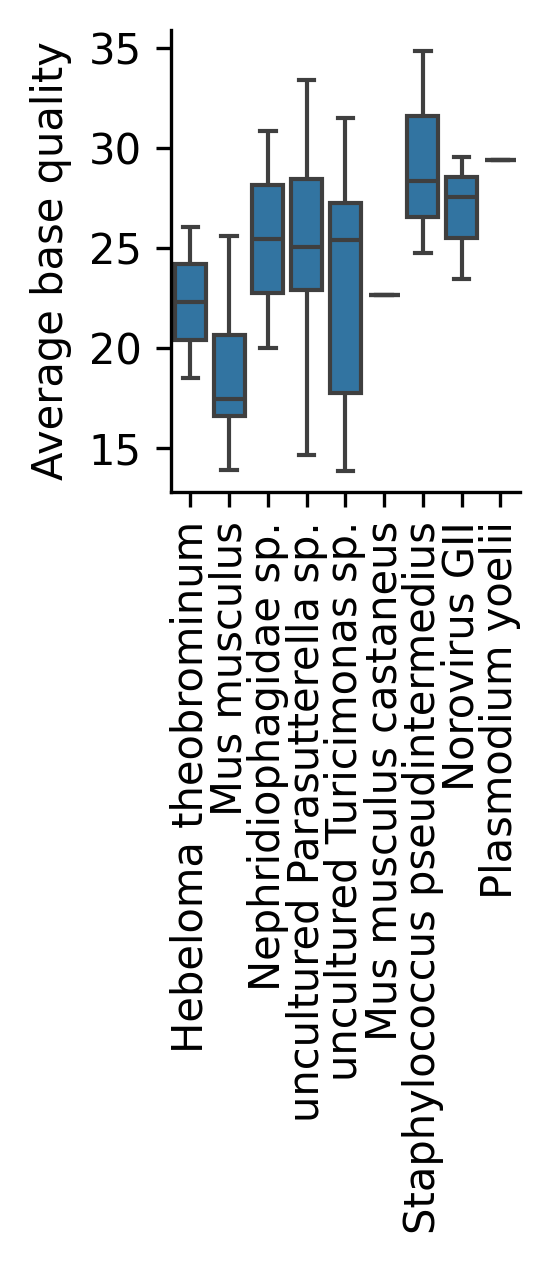

In [14]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.5, 2

sns.boxplot(bdf, 
            x='Scientific Name', 
            showfliers=False,
            y='mean_base_quality')

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('Average base quality')
plt.xlabel('')
sns.despine()

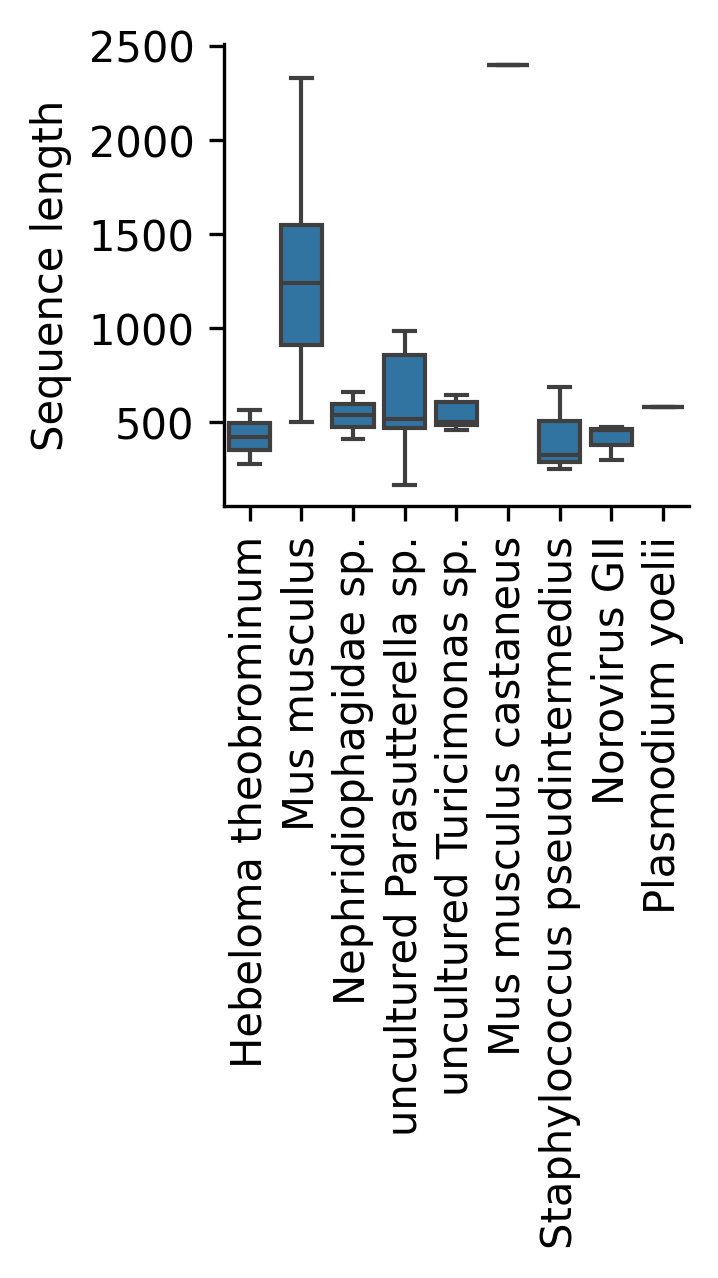

In [20]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 2, 2

sns.boxplot(bdf, 
            x='Scientific Name', 
            y='seq_length',
            showfliers=False)

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('Sequence length')
plt.xlabel('')
sns.despine()

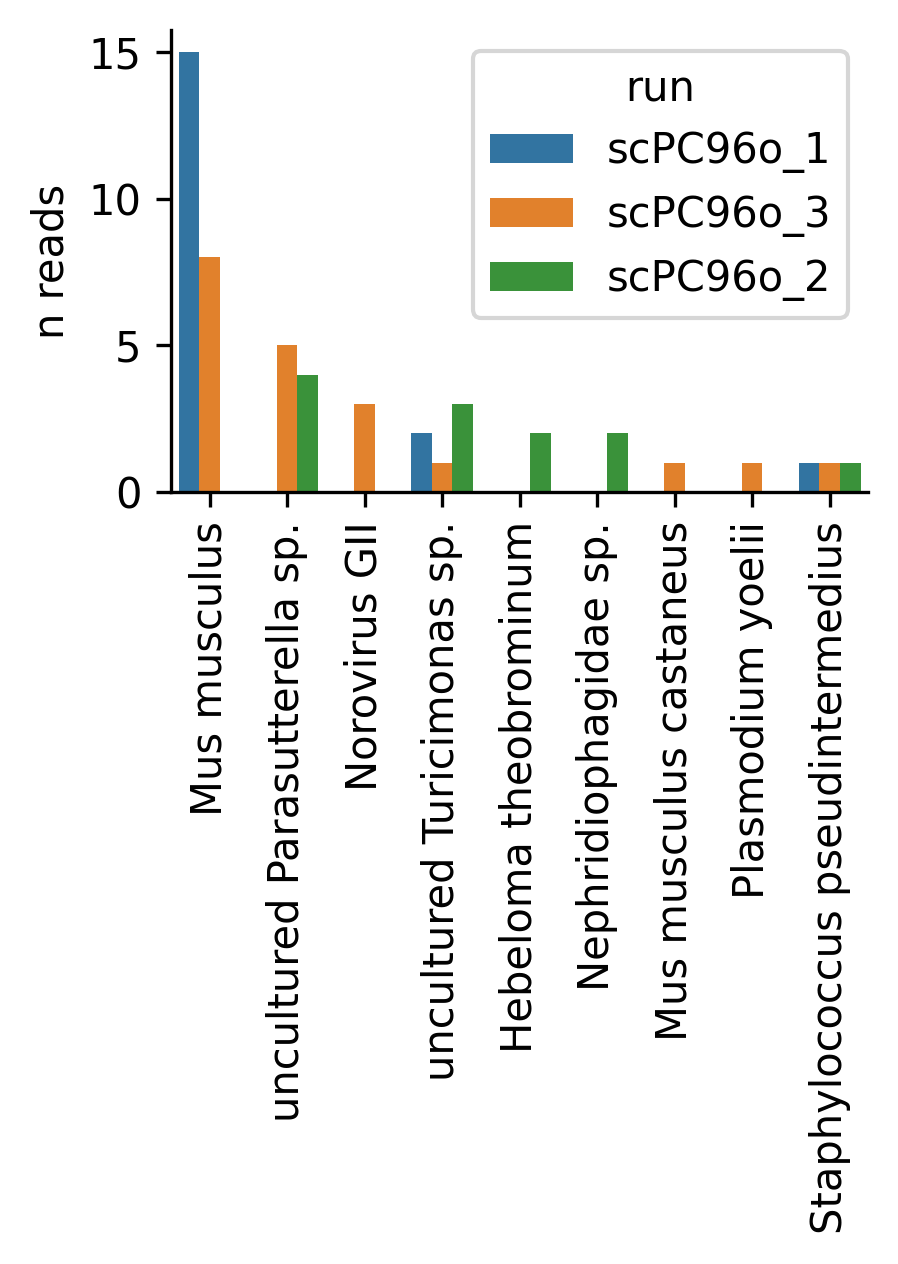

In [28]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 2

tmp = bdf.copy()
tmp = tmp[['Scientific Name', 'run']].value_counts().reset_index()


sns.barplot(data=tmp, 
            x='Scientific Name',
            y='count',
            hue='run')

plt.gca().tick_params(axis='x', rotation=90)
plt.ylabel('n reads')
plt.xlabel('')
sns.despine()

In [13]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# check alignment

# alignment against references

In [ ]:
ref_path = "/nfs/turbo/umms-indikar/shared/projects/poreC/data/references/non_mouse/GCA_024733725.1_ASM2473372v1_genomic.fna"
# ref_path = "/nfs/turbo/umms-indikar/shared/projects/poreC/data/references/fasta/Mus_musculus.GRCm39.dna.toplevel.fa"
a = mp.Aligner(ref_path, preset='map-ont')

pdf = res.copy()
for idx, rec in pdf.head(1).iterrows():
    seq = rec['sequence']
    print(rec)

    for hit in a.map(seq):
        print(hit.ctg)
    

    


In [ ]:
list(a.map(seq))

In [ ]:
seq